# 5.2 Exercise: Build your own Sentiment Analysis Model

From the Week 3 excercise, we have completed the following using NLTK library,  

Tokenized the words using word_tokenize.   
Removed the punctuation using transalation.   
Removed the by using stopwords.words('english').  
Used the PorterStemmer to get the stem of the words.  
Used the to_csv function with index = false, to convert the dataframe from the week and saved locally.
Used read_csv function to read the previously created cleaned dataframe.  



In [32]:
# Load the dataset as a Pandas data frame.

import pandas as pd

stemmeddata = pd.read_csv(r'C:\Users\Riaz\Desktop\MSDS\Data Mining\Week 5\stemmeddata.csv')

# Required libraries are imported and using the read_csv function the dataframe has been loaded from csv file.

stemmeddata

,id,sentiment,review,review_trans
0,5814_8,1,with all this stuff going down at the moment w...,stuff go moment mj ive start listen music watc...
1,2381_9,1,"\the classic war of the worlds\"" by timothy hi...",classic war world timothi hine entertain film ...
2,7759_3,0,the film starts with a manager (nicholas bell)...,film start manag nichola bell give welcom inve...
3,3630_4,0,it must be assumed that those who praised this...,must assum prais film greatest film opera ever...
4,9495_8,1,superbly trashy and wondrously unpretentious 8...,superbl trashi wondrous unpretenti 80 exploit ...
...,...,...,...,...
24995,3453_3,0,it seems like more consideration has gone into...,seem like consider gone imdb review film went ...
24996,5064_1,0,i don't believe they made this film. completel...,dont believ made film complet unnecessari firs...
24997,10905_3,0,"guy is a loser. can't get girls, needs to buil...",guy loser cant get girl need build pick strong...
24998,10194_3,0,this 30 minute documentary buñuel made in the ...,30 minut documentari buñuel made earli 1930 on...


In [33]:
# Splitting the data into train and test by using the train_test_split function and passing the testsize as 0.2 to denote 20%

from sklearn.model_selection import train_test_split
stemmeddata_train, stemmeddata_test, sentiment_train, sentiment_test = train_test_split(stemmeddata['review_trans'], stemmeddata['sentiment'], test_size=0.2, random_state=42)



In [34]:
# Creating TfidfVectorizer object and fitting the data from training subset

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(stemmeddata_train)

# After fitting the data, we are converting to sparse matrix of tf-idf values by using transform

stemmeddata_train_tfidf=tfidf.transform(stemmeddata_train)
print("The sparse matrix of training dataset is\n",stemmeddata_train_tfidf)


The sparse matrix of training dataset is
   (0, 71195)	0.04877844355146367
  (0, 70946)	0.07724967372328766
  (0, 70398)	0.10146313768269964
  (0, 69751)	0.03262306858155704
  (0, 69520)	0.0340907743314614
  (0, 68214)	0.1468766439095523
  (0, 67278)	0.06267195567574085
  (0, 66270)	0.03813224845611727
  (0, 66061)	0.04419533857693948
  (0, 65885)	0.06699722324244049
  (0, 65835)	0.05116581530950597
  (0, 64811)	0.05111027463249726
  (0, 64432)	0.0863920671025752
  (0, 64205)	0.05282538829060726
  (0, 63928)	0.034914830422654815
  (0, 62144)	0.07579103130507554
  (0, 61642)	0.10612082044487717
  (0, 60924)	0.10378298280403205
  (0, 60330)	0.08750774365897139
  (0, 60252)	0.08693909185265546
  (0, 59674)	0.10241194420200066
  (0, 59257)	0.08339846334616086
  (0, 59102)	0.10744961226918635
  (0, 57872)	0.0583389026709304
  (0, 57666)	0.03653739557703778
  :	:
  (19999, 28058)	0.08520259431423319
  (19999, 27158)	0.05239569413893726
  (19999, 25904)	0.22295530029939414
  (19999, 23137)	0.

In [35]:
# Using the same tfidf object , which learned from train to create the tf-idf for test dataset,

stemmeddata_test_tfidf=tfidf.transform(stemmeddata_test)
print("The sparse matrix of test dataset is\n",stemmeddata_test_tfidf)

The sparse matrix of test dataset is
   (0, 71210)	0.17164971943307547
  (0, 70750)	0.0861941716608557
  (0, 70314)	0.08764143767763724
  (0, 70097)	0.12491503424717951
  (0, 69408)	0.05415370490935348
  (0, 69384)	0.09660708667232416
  (0, 65618)	0.07101619881816086
  (0, 64486)	0.05162785933162635
  (0, 63813)	0.09099486721382037
  (0, 62120)	0.09859137464721672
  (0, 60398)	0.08271213377930703
  (0, 59577)	0.18679975501541998
  (0, 56438)	0.3756722742773221
  (0, 56186)	0.06843949346445037
  (0, 56181)	0.14426318385687967
  (0, 56175)	0.06927563360227275
  (0, 55889)	0.08673402350075811
  (0, 52219)	0.09270275288492029
  (0, 51921)	0.18214291797522386
  (0, 50366)	0.16984958668207276
  (0, 50294)	0.13912477416026095
  (0, 48406)	0.12506884596733092
  (0, 48259)	0.12200996661890193
  (0, 48091)	0.06442398882328335
  (0, 45912)	0.04226437352862034
  :	:
  (4999, 28496)	0.07267603405096415
  (4999, 28432)	0.06642258554579081
  (4999, 26502)	0.0732947731344721
  (4999, 25904)	0.08526414

We have applied but not fitted the tf-idf vectorization to the test set.  This is because, when we fit the train dataset, the model object learns and gets populated with the vocabulary and the frequency.  
This ensures that the test data is transformed based on the same vocabulary and IDF values as the training data, as we are using the same model.  

# Logistic regression

In [36]:
# Training logistic regression using train dataset

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg_model=logreg.fit(stemmeddata_train_tfidf,sentiment_train)

# Finding the accuracy on test set using score function

print ("The accuracy of the logistic regression model on test data is\n",logreg_model.score(stemmeddata_test_tfidf,sentiment_test))

The accuracy of the logistic regression model on test data is
 0.89


In [37]:
# Testing the logistic regression model manually by predicting on the test data 

test=logreg_model.predict(stemmeddata_test_tfidf)
test1=pd.Series(test)

# Concatenating the original test target and the predicted target,

test_df1=pd.concat([sentiment_test.reset_index(drop=True),test1.reset_index(drop=True)],axis=1)

test_df1['output_comparison'] = test_df1.apply(lambda row: 'Equal' if row['sentiment'] == row[0] else 'No', axis=1)

print (test_df1['output_comparison'].value_counts())

print ("As per the above values the accuracy of the model on test data is 89%")

output_comparison
Equal    4450
No        550
Name: count, dtype: int64
As per the above values the accuracy of the model on test data is 89%


Confusion matrix for logistic regression is
 [[2170  311]
 [ 239 2280]]


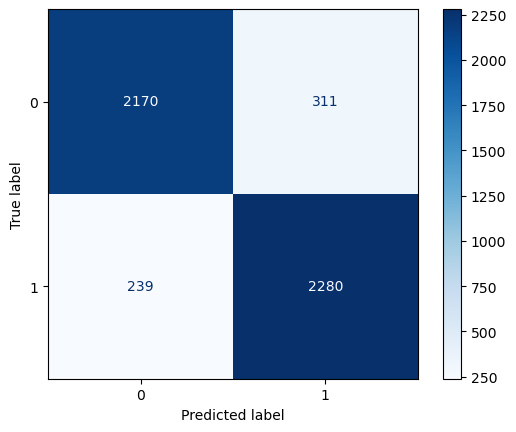

In [38]:
# Importing libraries for confusion matrix and its display,

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(sentiment_test, test1)
print ("Confusion matrix for logistic regression is\n",cm)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [39]:
# Calculating the Precision, recall, F1 score of test class,

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
precision = precision_score(sentiment_test, test1, average=None)
recall = recall_score(sentiment_test, test1, average=None)
f1 = f1_score(sentiment_test, test1, average=None)

# Print the results
print("Precision for test set for each class: ", precision)
print("Recall for test set for each class: ", recall)
print("F1-score for test set for  each class: ", f1)


Precision for test set for each class:  [0.90078871 0.87996912]
Recall for test set for each class:  [0.87464732 0.90512108]
F1-score for test set for  each class:  [0.88752556 0.89236791]


In [40]:
# Calculating the RoC curve of test class,


from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
y_pred_proba = logreg_model.predict_proba(stemmeddata_test_tfidf)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(sentiment_test, y_pred_proba[:,1])

# Compute the AUC score
auc_score = roc_auc_score(sentiment_test,y_pred_proba[:,1])

print(f"AUC Score of the model is: {auc_score:.2f}")

print("The classes of the model are\n",logreg_model.classes_)

AUC Score of the model is: 0.96
The classes of the model are
 [0 1]


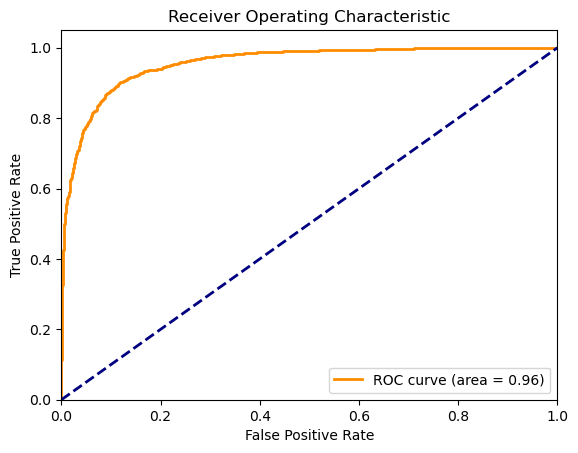

In [41]:
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Analysis of logistic regression model

As the AUC Score of the model is: 0.96, we are considering logistic regression as an excellent model.  
Precision score is 90% and recall score is 87% which is very good.
Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
F1 score is 0.88, which is considered to be a excellent model. F1 score combines both precision and recall to give a single performance metric.
RoC curve is also very good by not being close to the diagonal line.
Recall measures the proportion of actual positive cases that the model correctly identified.


# SVM classification model

I am using SVM classification model as an alternative to logistic regression and evaluating the model metrics.  


In [42]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Create support vector classifier
svc = LinearSVC(C=1.0)
#svc=SVC(kernel="linear", probability=True, random_state=0)

# Train model
svc_model = svc.fit(stemmeddata_train_tfidf,sentiment_train)

svc_test=svc_model.predict(stemmeddata_test_tfidf)
svc_test1=pd.Series(svc_test)
svc_test1

C:\Users\Riaz\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0       0
1       0
2       0
3       1
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Length: 5000, dtype: int64

In [43]:
# Calculating the Precision, recall, F1 score of test class of SVC model,

precision_svc = precision_score(sentiment_test, svc_test1, average=None)
recall_svc = recall_score(sentiment_test, svc_test1, average=None)
f1_svc = f1_score(sentiment_test, svc_test1, average=None)

# Print the results
print("Precision for test set for each class for SVC model: ", precision_svc)
print("Recall for test set for each class for SVC model: ", recall_svc)
print("F1-score for test set for  each class for SVC model: ", f1_svc)


Precision for test set for each class for SVC model:  [0.89417555 0.88251366]
Recall for test set for each class for SVC model:  [0.87867795 0.8975784 ]
F1-score for test set for  each class for SVC model:  [0.88635902 0.88998229]


Confusion matrix for SVC regression model is
 [[2180  301]
 [ 258 2261]]


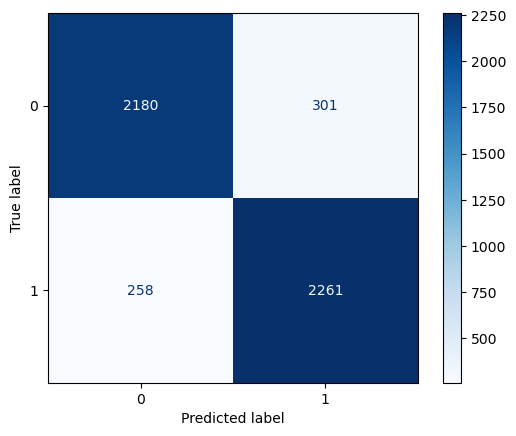

In [44]:
# Importing libraries for confusion matrix and its display,

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm_svc = confusion_matrix(sentiment_test, svc_test1)
print ("Confusion matrix for SVC regression model is\n",cm_svc)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [45]:
# Calculating the RoC curve of test class for SVC model,


from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay,auc

#y_pred_proba_svc = svc_model.predict_proba(stemmeddata_test_tfidf)

# Get decision function scores
decision_scores = svc_model.decision_function(stemmeddata_test_tfidf)

# Compute ROC curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(sentiment_test, decision_scores)
roc_auc_svc = auc(fpr_svc, tpr_svc)

print("ROC AUC Score:", roc_auc_svc)

ROC AUC Score: 0.9559376149566399


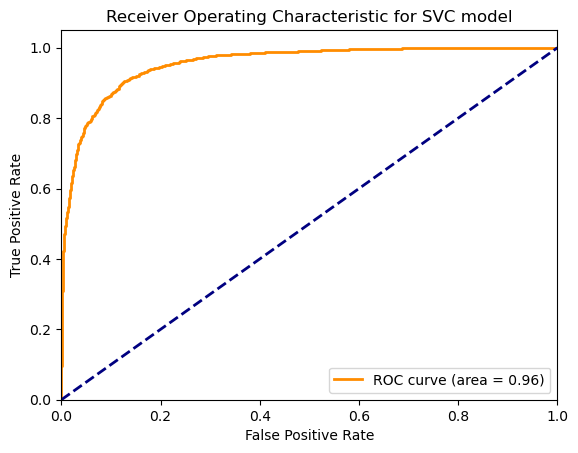

In [46]:
# Plot the ROC curve for SVC model
plt.figure()
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVC model')
plt.legend(loc="lower right")
plt.show()

# Conclusion

From the above analysis of metrics of both the logistic regression and SVC models, all the values like RoC Curve, Precision, Recall and F1 scores are almost similar.  
Both are considered to be very good models based on their model metrics.  